오버피팅을 알기 위해서는, 그래프를 그리고 찾는 방법밖에 없다. 그래프를 안 그리고 찾을 수 있는 방법은 없다. (pdf 파일 참조) 데이터가 많다는 가정 하에서 진행을 하는 것이다.

<pdf src = 'C:/Users/white/AI_INNO/deep1.pdf'>
    
### 언더피팅을 어떻게 해결해야 할까?

모델 자체를 다시 만드는게 가장 현명한 방법이다. 그러면 뭐가 문제가 있다는 것이다. 그래디언트가 배니싱되었거나 하는 것이다.

### 오버피팅을 해결하는 방법

 - 1. 데이터 수 늘린다.
 - 2. 모델 간단하게 한다. 그래서 기계학습에서는 feature selection해서 컬럼 수 줄인다.
 - 3. 딥러닝에서는 레이어 줄이고, dropout써서 노드 줄인다.
 - 4. early stopping써서 오버피팅되기 전에 막는다.
 - 5. ensemble: 중간값으로 합쳐버리니까 오버피팅 안 난다. (배깅, 부스팅)
 - 6. stacking: 각각 나온 결과를 다시 학습시켜서 예측을 한다. 근데 딥러닝 자체가 스택킹이라서 딥러닝에서는 잘 안 쓴다.
 - l1, l2 써서 막을 수 있다. (패널티라고도 한다.)
 - Cross validation을 쓰는 상황 -> 모델의 성능을 측정하기 위해서 (no free lunch) 그런데 데이터를 쪼갤 때 마다 좀 문제가 있다. (Data shift: traindata에는 있는데 test데이터엔 없어서 틀리는 경우 등) / cross validation을 써서 평균낸 것은 전체적인 성능이라고 할 수 있다. 그래서 정확히 말하자면, 오버피팅을 확인하는 용도이지 오버피팅을 막는 방법은 아니다. cross validation의 문제점은 시간의 문제점이 있다. 10 fold면 10배 시간이 더 걸린다. (원래 데이터 작을 때 쓰는 기법이다.) 딥러닝쪽에서는 크로스밸리데이션 잘 안한다. (그런데 사업하려면 어쩔 수 없이 해야 한다...)
 - 데이터가 작으면 오버피팅 훨씬 많이 생긴다.

 
영상처리쪽은 배깅을 좀 많이 쓴다 한다.

### 데이터가 충분하지 않을 경우

loss 그래프가 요동치면, 데이터가 부족하다는 것이다. 굿 피팅에 있는 그래프는 이상적인 그래프이다. 상상속에 있는 그래프이다. 보통은 loss가 올라가는 것이다.

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

 - 밸리데이션 그래프가 점점 올라가는게 정상적이다.
 - 얼리스타핑 사용하면 오버피팅 생기기 전에 끊을 수 있다.
 - 비슷한 성능이면 더 간단한 모델을 선택하는게 좋다.

https://keras.io/examples/cifar10_cnn/

# Train a simple deep CNN on the CIFAR10 small images dataset.

In [1]:
import tensorflow
import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

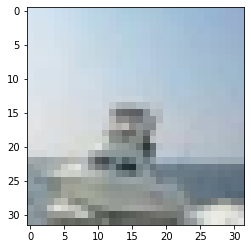

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[100]) # 이미지 크기가 엄청 작다.

In [6]:
cifar10.__doc__ # 작은 이미지 대회용으로 사용된 것이다. 10가지 종류가 있다.
# 예전의 mnist비슷한 것이다.

'CIFAR10 small images classification dataset.\n\n'

In [7]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

### 원핫 인코딩으로 바꿔주기

In [8]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
# num class를 지정해줘야 하는 이유는, 클래스 불균형이 일어날 경우
# 자동으로 10개에서 9개를 만들어 버리기 때문이다. 그래서 10개라고 명시해야 한다.
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### 모델 만들기

이건 mnist와 달리, 3채널인데 60000만개 밖에 없으니 성능이 떨어질 수 밖에 없다.

#### 이미지 전처리 기법 (전략)

1. 생으로 텐서 만드는 전략
2. ImageData_generator쓰는 방법: 축복 수준으로 편하다.
3. 텐서플로를 쓸까, 파이토치를 쓸까...

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
x_train = x_train.astype('float32') # opencv에서도 tensorflow도 다 float32이다.
x_test = x_test.astype('float32')
x_train /= 255 # 칼라 이미지도 이렇게 전처리 한다.
x_test /= 255 # 255.0으로 나누면 float32로 되는 경우도 있다.

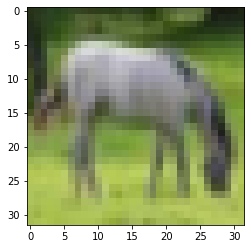

In [17]:
plt.imshow(x_train[87]) # 바뀌긴 바뀌는데 미묘하게 바뀐다.

In [32]:
x_train[0].shape

(32, 32, 3)

In [7]:
def model_create():
    model = Sequential()
    model.add(Conv2D(32, # 32개의 특징
                     (3, 3), # 커널크기
                     padding='same', # 줄이고 난 후, 같은 크기로 맞춰줌
                     # valid는 스트라이드 개수 때문에 못할때, 유요한 놈들만...
                     input_shape=x_train.shape[1:]))
    # 커널이 크면 큰 특징을 잡고, 커널이 작으면 작은 특징을 잡는다.
    model.add(Activation('relu')) # 스테이츠 머신 방식
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu')) # 렐루는 기본적으로 gradient vanishing이 잘 안생긴다.
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # 요새는 맥스풀링 자체를 안해버리는 경우도 많다.
    # 3 x 3에 랜덤하게 값이 들어가는데
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512)) # 개수는 내맘대로
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('relu'))

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', # 문자열이 들어가면 기본옵션값이 들어간다.
                  # 1. 문자열 쓰기
                  # 2. 케라스에 정의된 클래스 인스턴스 쓰기 ★
                  # 3. 상속 받아서 만들기
                  # 4. tf.nn.에 정의된 애들 쓰기.. 이건 옵티마이저인데...??
                  metrics=['accuracy'])
    return model

In [35]:
x_train.shape[1:]

(32, 32, 3)

In [11]:
# 기본적인 훈련
model1 = model_create()
model1.fit(x_train, y_train,
              batch_size=32,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 214us/sample - loss: 2.3233 - accuracy: 0.0971 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 199us/sample - loss: 2.3034 - accuracy: 0.0977 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 10s 202us/sample - loss: 2.3054 - accuracy: 0.1000 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 10s 201us/sample - loss: 2.3046 - accuracy: 0.1000 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 202us/sample - loss: 2.3046 - accuracy: 0.0991 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 201us/sample - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [====================

KeyboardInterrupt: 

In [ ]:
model1.evaluate(x_test, y_test, verbose = 2)
# loss가 안변함 -> 시그모이드로 해서 그렇다. 학습이 안되는 것이다.

성능을 높이기 위해 데이터 오그먼테이션 해볼꺼다. 그게 뭥미...

In [22]:
# 자주 쓰는 꼼수중에 하나다. 잘 모를 때 이거만한게 없다.
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # ★apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

In [21]:
model2 = model_create()
datagen.fit(x_train) # 얘는 디렉토리 데이터가 아니라 넘파이 데이터이다.

NameError: name 'model_create' is not defined

In [18]:
dir(datagen.flow(x_train, y_train, batch_size=32))
# 이런 상태가 될 때야 next가 튀어 나온다.
datagen.flow # 제너레이터 만들어 주는거다. 까먹지 말 것. ★★★

NameError: name 'datagen' is not defined

In [67]:
model2.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=32),
                     epochs=5,
                     validation_data=(x_test, y_test),
                     workers=4) # 개를 동시에 처리... 

Epoch 1/5
1561/1563 [============================>.] - ETA: 0s - loss: 2.3212 - accuracy: 0.0971

RuntimeError: Your generator is NOT thread-safe. Keras requires a thread-safe generator when `use_multiprocessing=False, workers > 1`. 

In [52]:
model2.evaluate(x_test, y_test, verbose=2)

10000/1 - 1s - loss: 0.7518 - accuracy: 0.7083


[0.8339048712730408, 0.7083]

이미지 데이터 제너레이터는 그 옵션만 가지고 하는 애고, flow를 통해서 제너레이터로 바꿔준다. 

이 이미지 데이터 제너레이터 쓰려면, fit generator써야 한다. 그냥 fit으로는 안된다.

모델 저장하는 것 중요. 아래와 같이 하면 된다.

In [ ]:
model_path = os.path.join(save_dir, model_name)
model2.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# 콜백 텐서보드

In [12]:
%lsmagic # 퍼센트로 쓸 수 있는 애들 다 튀어나온다. 텐서보드는 없다.

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [13]:
%load_ext tensorboard

In [14]:
%lsmagic # 텐서보드가 들어가있다. 2.0부터 된다.

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %tensorboard  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%p

In [15]:
%tensorboard

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2019-12-05 17:12:55.454351: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library cudart64_100.dll
Error: A logdir or db must be specified. For example `tensorboard --logdir mylogdir` or `tensorboard --db sqlite:~/.tensorboard.db`. Run `tensorboard --helpfull` for details and examples.